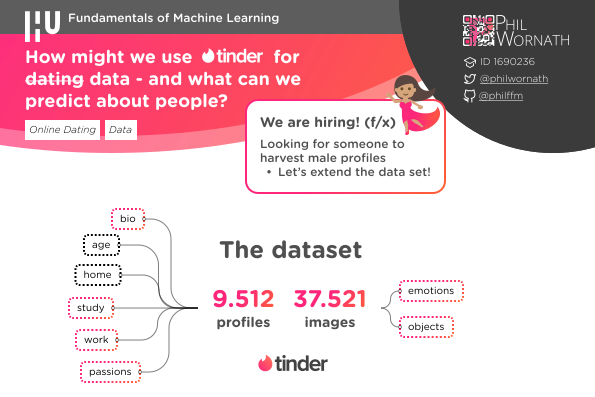

In [463]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://raw.githubusercontent.com/philffm/ddd_fml/main/t_header.svg'))
show_svg()

# Introduction: Tinder dataset

## Variables and ideas

### Numerical Variables 
- Profile Bio length (bio_length)
- Profile Picture length (image_l)
### Categorical Variables
- Work

- Education
- Location
- Passions
    - Predict emotional dimension from the passion

## Tinder image processing
- Emotion
- Object detection
    - 'Showing-off' index?
    - 'Happiness' index?

## To-dos

- What were  results and how did I interpret them


After 3500 profiles, it appeared as if swiped the entire Netherlands in a radius of 100km, which got me surprised as there must be around 2 million Tinder users in the given age range. 
As it turned out, a large amount of profiles were from Utrecht, plus profiles from other cities where the users indicated 

### New strategy
- Going from city to city with a radius of 10km each
- Focus on cities with major work options


# Data pre-processing


In [464]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [465]:

df = pd.read_json('data/geomatches/geomatches.json')
df = df.transpose()
# df = df.where(pd.notnull(df), None)
# get


## Reading in the face objects

In [466]:
file = '/Users/phil/dev/hu_ddd/yolov5/capture.txt'
with open(file, 'r') as f:
    images = f.readlines()

replace = ['image 1/1 /Users/phil/dev/hu_ddd/TinderBotz/data/geomatches/images/','.jpg:', '640x512', '640x640']
for t in replace:
    images = list(map(lambda st: str.replace(st, t,''), images))

def remove_last_comma(x):
    return x[:-3]
    # letter_list = a_string.split(",")
def remove_before(x):
    return x[0:]
    # letter_list = a_string.split(",")


def to_singular(x):
    # started with manual definition of plurals - but not scalable
    # singularize library didn't work with python3
    # plurals = ['knifes', 'persons', 'bananas', 'happys', 'sads', 'normals', 'wine glasss', 'dogs', 'cats', 'cats']
    
    # found better method just checking whether last char is an 's'
    x_clean = []
    for word in x:
        if word[-1] == 's' and word[:-1] in items:
            if 'glasss' in word: 
                x_clean.append(word[:-1])
            elif 'glass' in word: 
                pass
            else:
                x_clean.append(word[:-1])

        else:
            x_clean.append(word)
    return x_clean

def remove_ghostcommas(x):
    x_clean = []
    
    for item in x:
        if item == " ":
            pass
        else:
            x_clean.append(item[1:])
    
    return x_clean

    

last_s = ['persons']
df_o = pd.DataFrame(images, columns = ['raw'])
df_o['file_name'] = df_o['raw'].apply(lambda x: x.split(" ", 1)[0])
df_o['objects'] = df_o['raw'].apply(lambda x: x.split("  ", 1)[1])
# Remove last comma
df_o['objects'] = df_o['objects'].apply(remove_last_comma)
# commas still in place for successful regex match
df_o['objects_os'] = df_o['objects'].str.findall(r'[^,0-9\n^,]+')
# remove last commas / cleanup
df_o['objects_os'] = df_o['objects_os'].apply(remove_ghostcommas)

items = []
# listing unique objects
for item in df_o.objects_os:
    for o in item:
        items.append(o)
# Removing duplicates
items = [*{*items}]

# create singular list
items_sin = to_singular(items)
items_sin = [*{*items_sin}]
items_sin.sort()

df_o['objects_os'] = df_o['objects_os'].apply(to_singular)
df_o['objects_amount'] = df_o['objects'].str.findall(r'(\d{1,2})')
df_o = df_o[df_o['objects_os'].str.len() >= 1]


def split_objects(x):
    objects = []
    objects.extend(x.split(", "))
    # letter_list = a_string.split(",")

    return objects
def objects_to_df(x):
    objects = []
    objects.extend(x.split(", "))
    # letter_list = a_string.split(",")
    return objects


df_o

,raw,file_name,objects,objects_os,objects_amount
0,"0aff3d45d70e3f443932716e4d4e7c5c 1 normal, \n",0aff3d45d70e3f443932716e4d4e7c5c,1 normal,[normal],[1]
1,"0aff3d45d70e3f443932716e4d4e7c5c 1 normal, \n",0aff3d45d70e3f443932716e4d4e7c5c,1 normal,[normal],[1]
2,"0aff3d45d70e3f443932716e4d4e7c5c 1 normal, \n",0aff3d45d70e3f443932716e4d4e7c5c,1 normal,[normal],[1]
3,"0aff3d45d70e3f443932716e4d4e7c5c 1 person, \n",0aff3d45d70e3f443932716e4d4e7c5c,1 person,[person],[1]
4,"8977c8cd65a401479cc8298d1895aa2e 1 person, 1 handbag, 1 cell phone, \n",8977c8cd65a401479cc8298d1895aa2e,"1 person, 1 handbag, 1 cell phone","[person, handbag, cell phone]","[1, 1, 1]"
...,...,...,...,...,...
77242,"eb319cfc4a912844df224fbb0279b589 4 happys, \n",eb319cfc4a912844df224fbb0279b589,4 happys,[happy],[4]
77243,"556568860df58896eb5a8f5a0ec75ba3 1 person, 1 wine glass, 1 cup, 1 fork, 3 knifes, 1 chair, 1 dining table, \n",556568860df58896eb5a8f5a0ec75ba3,"1 person, 1 wine glass, 1 cup, 1 fork, 3 knifes, 1 chair, 1 dining table","[person, wine glass, cup, fork, knife, chair, dining table]","[1, 1, 1, 1, 3, 1, 1]"
77244,"556568860df58896eb5a8f5a0ec75ba3 1 happy, \n",556568860df58896eb5a8f5a0ec75ba3,1 happy,[happy],[1]
77245,"c9c3856612947a85afd738aa32932980 1 person, 1 wine glass, 1 couch, \n",c9c3856612947a85afd738aa32932980,"1 person, 1 wine glass, 1 couch","[person, wine glass, couch]","[1, 1, 1]"


## Restrict the dataset in size for testing

In [467]:

# df = df[df['name'] == 'Yvette']


## Get objects into dataframe
Challenge: Every profile entity has multiple image names - had to retrieve and summarize the amount of imagesobjects from the unstructured separate dataframe

In [468]:
def get_objects(x):
    for img in x:
        df_sphoto = df_o[df_o['file_name'].str.contains(img) == True]
        new_tup = [(row.objects_os, row.objects_amount) for row in df_sphoto.itertuples(index=True, name='Pandas')]
        # print(new_tup)
        return new_tup
        
df['objects'] = df['images_by_hashes'].apply(get_objects)
df.objects

    

Sarah25_A6U6      [([person, umbrella, bottle, wine glass, donut, chair, dining table, laptop], [8, 3, 2, 1, 1, 1, 3, 1]), ([happy, normal], [1, 1])]
Isa21_ON15        [([person], [1]), ([sad], [1])]                                                                                                    
Vivian22_5KUH     [([person], [1])]                                                                                                                  
Vinetar25_4KA5    [([person], [1])]                                                                                                                  
Lyanne24_TPZ5     [([person, bottle, wine glass], [1, 2, 3]), ([happy], [1])]                                                                        
                                             ...                                                                                                     
Ple25_RK39        [([person], [1]), ([happy], [1])]                                                 

# Data Cleaning ✨

In [469]:
# df.replace(np.NaN, '', inplace=True)
df.fillna(df.mean(), inplace=True)
# df.replace(0, np.nan, inplace=True)



undefined:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [470]:
# Drop duplicates, as some profiles were scraped twice - requires multiple filters because sometimes there are even profiles with same name, age and work!
df = df.drop_duplicates(subset=['name', 'age', 'work','study', 'bio'])


drop_cols = ['gender','image_urls']
df.drop(drop_cols, inplace=True, axis=1)



Apply the correct data types

In [471]:
df["age"] = pd.to_numeric(df["age"], errors='coerce')
df["distance"] = pd.to_numeric(df["distance"], errors='coerce')
# df['passions'] = df['passions'].astype('str')
# df['passions'] = df['passions'].lower
df['bio'] = df['bio'].astype(str)
df['home'] = df['home'].map(str)
df['home'] = df['home'].str.strip()
df['home'] = df['home'].map(str.lower)
df['work'] = df['work'].map(str)
df['study'] = df['study'].map(str)
# Stringify and lower 'passions'  
df['passions'] = df['passions'].map(str)
df['passions'] = df['passions'].map(str.lower)
df['bio_length']  = df['bio'].str.len()

In [472]:
df.dtypes

name                object 
age                 float64
work                object 
study               object 
home                object 
bio                 object 
distance            float64
passions            object 
images_by_hashes    object 
objects             object 
bio_length          int64  
dtype: object

## Precautions

- Lowering columns to prevent inconsistencies

In [473]:
df['study'] = df['study'].apply(lambda x:x.lower())
df['work'] = df['work'].apply(lambda x:x.lower())


In [474]:
df.describe()


,age,distance,bio_length
count,9184.000000,9184.000000,9184.000000
mean,23.778331,260.767445,49.404617
std,2.470256,1427.871732,81.744938
min,18.000000,2.000000,0.000000
25%,22.000000,18.000000,4.000000
50%,23.000000,32.000000,15.000000
75%,25.000000,51.000000,57.000000
max,32.000000,16538.000000,500.000000


## Cleaning outliers

- Dropping all the Tinder passport users from Thailand


In [475]:
# Dropping all the Tinder passport users from Thailand
df = df[df["distance"] < 100 ]

df.describe()


,age,distance,bio_length
count,8591.000000,8591.000000,8591.000000
mean,23.758582,32.419392,47.416250
std,2.471202,20.488487,79.307139
min,18.000000,2.000000,0.000000
25%,22.000000,16.000000,4.000000
50%,23.000000,31.000000,15.000000
75%,25.000000,48.000000,54.000000
max,32.000000,98.000000,500.000000


# Feature Engineering 👷🏽‍♂️

## Extract passions to columns

In [476]:
# Write passion columns

passions = ['cat','dog','board games','drink','wine','instagram','reading', 'tea', 'environmentalism', 'cycling','sports','karaoke']

def write_passion(passion):
    if passion not in df.columns:
        # if passion == 'instagram':
        # fix column naming for passions with empty spaces 
        df[str.replace(passion, ' ','_')] = np.where(df['passions'].str.contains(passion), True, False)





## Classifiying Education 👨🏽‍🏫
To better explore and understand the potential correlations between education and the other variables, job and education description were categorised

In [477]:

uni = ['uni', 'hogeschool']
big_city = ['amsterdam','utrecht','haag', 'hague' ]

mbo = ['mbo', 'lyceum']

def education_type(x):
    if  'univ' in x or 'master' in x or 'uva' in x or 'psych' in x:
        return 'university'
    elif 'hoge' in x or 'hbo' in x or 'applied sciences' in x or 'student' in x or 'bachelor' in x or 'hotel school' in x or 'recht' in x or 'bedrijvsk' in x or 'windesheim' in x:
        return 'applied sciences'
    elif 'mbo' in x or 'lyceum' in x or 'pabo' in x or 'college' in x or 'zorg' in x or 'verpleeg' in x and 'uni' not in x:
        return 'mbo / pabo'
    else:
        return 'other'

def education_type_n(x):
    if 'university' in x:
        return 1
    elif 'applied sciences' in x:
        return 2
    elif 'mbo' in x:
        return 3
    else:
        return 4
def work_type(x):
    if  'student' in x or 'phd' in x or 'msc' in x :
        return 'student'
    elif  'verkoop' in x or 'medewe' in x or 'employee' in x :
        return 'employee'
    elif  'user' in x or 'ux' in x or 'design' in x or 'design' in x or 'photo' in x :
        return 'creative'
    elif  'cyber' in x or 'dev' in x or 'data' in x or 'engi' in x  :
        return 'tech'
    elif  'business' in x or 'consult' in x or 'adviseur' in x or 'bedrij' in x or 'marketing' in x or 'social me' in x or 'manager' in x:
        return 'big business'
    elif  'zelf' in x or 'entre' in x or 'ondern' in x or 'ceo' in x or 'coach' in x or 'eigen' in x:
        return 'entrepreneur'
    elif  'law' in x or 'recht' in x or 'just' in x or 'design' in x or 'photo' in x :
        return 'law'
    elif  'verple' in x or 'begel' in x or 'zieke' in x or 'dieren' in x or 'tanda' in x or 'zorg' in x :
        return 'health'
    else :
        return 'other'

def work_type_n(x):
    if 'student' in x:
        return 1
    elif 'employee' in x:
        return 2
    elif 'creative' in x:
        return 3
    elif 'tech' in x:
        return 4
    elif 'creative' in x:
        return 5
    elif 'big business / marketing / manager' in x:
        return 6
    elif 'entrepreneur' in x:
        return 7
    elif 'law' in x:
        return 8
    elif 'health' in x:
        return 9
    else:
        return 0


df['education_type'] = df['study'].apply(education_type)
df['education_type_n'] = df['education_type'].apply(education_type_n)
df['work_type'] = df['work'].apply(work_type)
df['work_type_n'] = df['work'].apply(work_type_n)

def image_l(x):
    return len(x)
# Create column for image amount 
df['image_l'] = df['images_by_hashes'].apply(image_l)

for passion in passions:
    write_passion(passion)


# df['bio_l'] = df['bio'].astype('str').len

## Summarize object types from object detection in columns

In [478]:

for item in items_sin:
    def get_objects_count(x):
        # print(item)
        iobject = 0
        sum = 0
        if x is not None:
            for object in x:
                if object is not None:
                    ituple = 0
                    if object is not None:
                        for tuple in object:
                            ivaluetuple = 0
                            for valuetuple in tuple:
                                if valuetuple == item:
                                    sum = sum + int(x[iobject][ituple+1][ivaluetuple])
                                    # print(valuetuple)
                                ivaluetuple+=1
                            ituple +=1
                        iobject += 1
                    # if sum>0:
                        # print(sum, item)
        return sum



    df['o_'+item] = df['objects'].apply(get_objects_count)

undefined:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['o_'+item] = df['objects'].apply(get_objects_count)


In [479]:
def things_sum():
    things = df.filter(regex='^o_')
    things_sum = things.sum(axis=0).sort_values(ascending=False)
    print(things_sum)
things_sum()

o_person            13092
o_happy             3911 
o_normal            1680 
o_sad               1319 
o_chair             1211 
o_cell phone        1141 
o_cup               848  
o_wine glass        823  
o_bottle            617  
o_car               578  
o_potted plant      578  
o_dining table      504  
o_boat              360  
o_handbag           305  
o_umbrella          267  
o_bowl              246  
o_bicycle           213  
o_book              169  
o_vase              162  
o_bench             142  
o_tie               131  
o_clock             113  
o_knife             102  
o_dog               90   
o_tv                81   
o_surfboard         77   
o_couch             75   
o_backpack          75   
o_fork              71   
o_remote            65   
o_bed               57   
o_frisbee           55   
o_spoon             54   
o_sink              53   
o_laptop            53   
o_cake              47   
o_apple             43   
o_cat               42   
o_toilet    

## Add total amount of objects

After there was not a high correlation with other variables (e.g. passions) I and became curious on whether objects in profile images can say something about people - and whether it might be possible to create a "Showing off"-Index

In [480]:
column_names = list(df.filter(regex='^o_').columns)
df['sum_of_things']= df[column_names[:-1]].sum(axis=1)


### Drop columns of objects of low quantity

Since keeping all objects in here created some fun correlations such as

- o_pizza - o_donut - 0.316238
- o_bear - o_vase - 0.494101
- o_teddy bear - o_broccoli - 0.186770

it was time to say good bye to objects with lower amounts to increase the accuracy

In [481]:
for col in df.filter(regex='o_').columns:
    if df[col].sum() < 1000:
        df.drop(col,1,inplace=True)

undefined:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(col,1,inplace=True)


In [482]:
things_sum()

o_person        13092
o_happy         3911 
o_normal        1680 
o_sad           1319 
o_chair         1211 
o_cell phone    1141 
dtype: int64


# Exploratory data analysis 🔎 

In [483]:
from wordcloud import WordCloud
def get_wordcloud(column):
    keyword = " ".join(n for n in df[column])
    plt.figure(figsize=(5, 5))
    wc = WordCloud(collocations=False).generate(keyword)
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
def get_thingscloud(column):
    keyword = " ".join(n for n in df_o[column])
    plt.figure(figsize=(5, 5))

    wc = WordCloud(collocations=False).generate(keyword)
    plt.imshow(wc, interpolation='bilinear')
    plt.show()


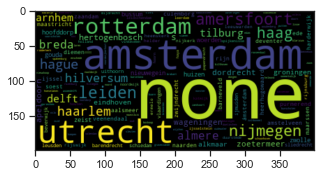

None

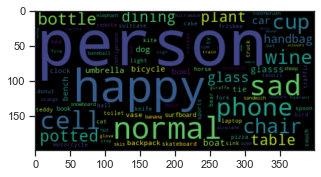

None

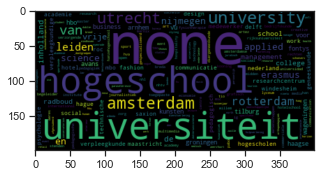

None

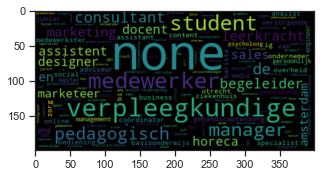

None

In [484]:
from IPython.display import display
display(get_wordcloud('home'))
display(get_thingscloud('objects'))
display(get_wordcloud('study'))
display(get_wordcloud('work'))

Let's see how many of x we have

In [485]:
df.work_type.value_counts()

other           7290
health          393 
big business    325 
employee        220 
student         151 
entrepreneur    72  
creative        61  
tech            44  
law             35  
Name: work_type, dtype: int64

It looks like a large number of people have not indicated a working title. But what about education?

It looks like a large number of people have not indicated a working title. But what about education?

In [486]:
df.education_type.value_counts()

other               5091
university          2016
applied sciences    1239
mbo / pabo          245 
Name: education_type, dtype: int64

## Correlation Analysis 🔬

This correlation analysis consists of a
- Correlation table
- Correlation matrix (filtered)
- Correlation sorted list (better overview)

,age,distance,bio_length,education_type_n,work_type_n,image_l,cat,dog,board_games,drink,...,cycling,sports,karaoke,o_cell phone,o_chair,o_happy,o_normal,o_person,o_sad,sum_of_things
age,1.000000,-0.007276,0.073691,0.109112,0.016318,-0.001732,0.030217,-0.005237,0.043549,-0.098751,...,0.047214,-0.002370,-0.007232,-0.059587,0.002882,0.000005,0.037097,-0.003241,0.002055,0.008519
distance,-0.007276,1.000000,-0.000241,0.093025,-0.007573,0.005910,-0.003338,0.015443,-0.009650,0.048728,...,0.022427,0.035613,0.011466,0.028591,-0.024478,-0.038189,0.016889,-0.021966,-0.000694,-0.048817
bio_length,0.073691,-0.000241,1.000000,-0.045725,0.032633,0.191515,0.079817,0.060663,0.049294,-0.060658,...,0.043416,-0.033318,0.035364,0.020471,-0.012847,-0.037208,-0.009436,-0.030442,0.047295,-0.030228
education_type_n,0.109112,0.093025,-0.045725,1.000000,-0.046756,-0.040930,0.007437,-0.004557,-0.032124,0.015681,...,-0.024103,-0.032759,-0.011918,0.012059,-0.025542,-0.053784,0.034125,-0.052049,0.013370,-0.065057
work_type_n,0.016318,-0.007573,0.032633,-0.046756,1.000000,0.040506,-0.007114,-0.011354,0.004377,0.004385,...,-0.005755,0.005493,0.014243,-0.002428,0.033613,0.015701,0.001160,0.001627,-0.003041,0.025650
image_l,-0.001732,0.005910,0.191515,-0.040930,0.040506,1.000000,0.039764,0.017355,0.030684,0.001059,...,-0.007074,0.024216,0.022369,0.023329,0.010998,0.000268,-0.015826,0.010477,0.010047,0.020762
cat,0.030217,-0.003338,0.079817,0.007437,-0.007114,0.039764,1.000000,0.018673,0.029211,0.032433,...,0.001911,-0.006619,0.016788,0.017427,-0.015147,-0.035681,0.014566,-0.020358,0.001822,-0.023441
dog,-0.005237,0.015443,0.060663,-0.004557,-0.011354,0.017355,0.018673,1.000000,0.036089,0.064308,...,0.035092,0.036865,0.019993,-0.006938,-0.004870,-0.012205,0.000631,-0.013381,0.024259,-0.011808
board_games,0.043549,-0.009650,0.049294,-0.032124,0.004377,0.030684,0.029211,0.036089,1.000000,0.049763,...,0.013912,0.026376,0.056733,-0.023149,0.017006,0.030249,-0.003081,0.004601,-0.008344,0.005827
drink,-0.098751,0.048728,-0.060658,0.015681,0.004385,0.001059,0.032433,0.064308,0.049763,1.000000,...,-0.011585,0.143807,0.033767,-0.000870,0.016844,0.010537,0.004648,-0.001767,-0.006076,0.010933


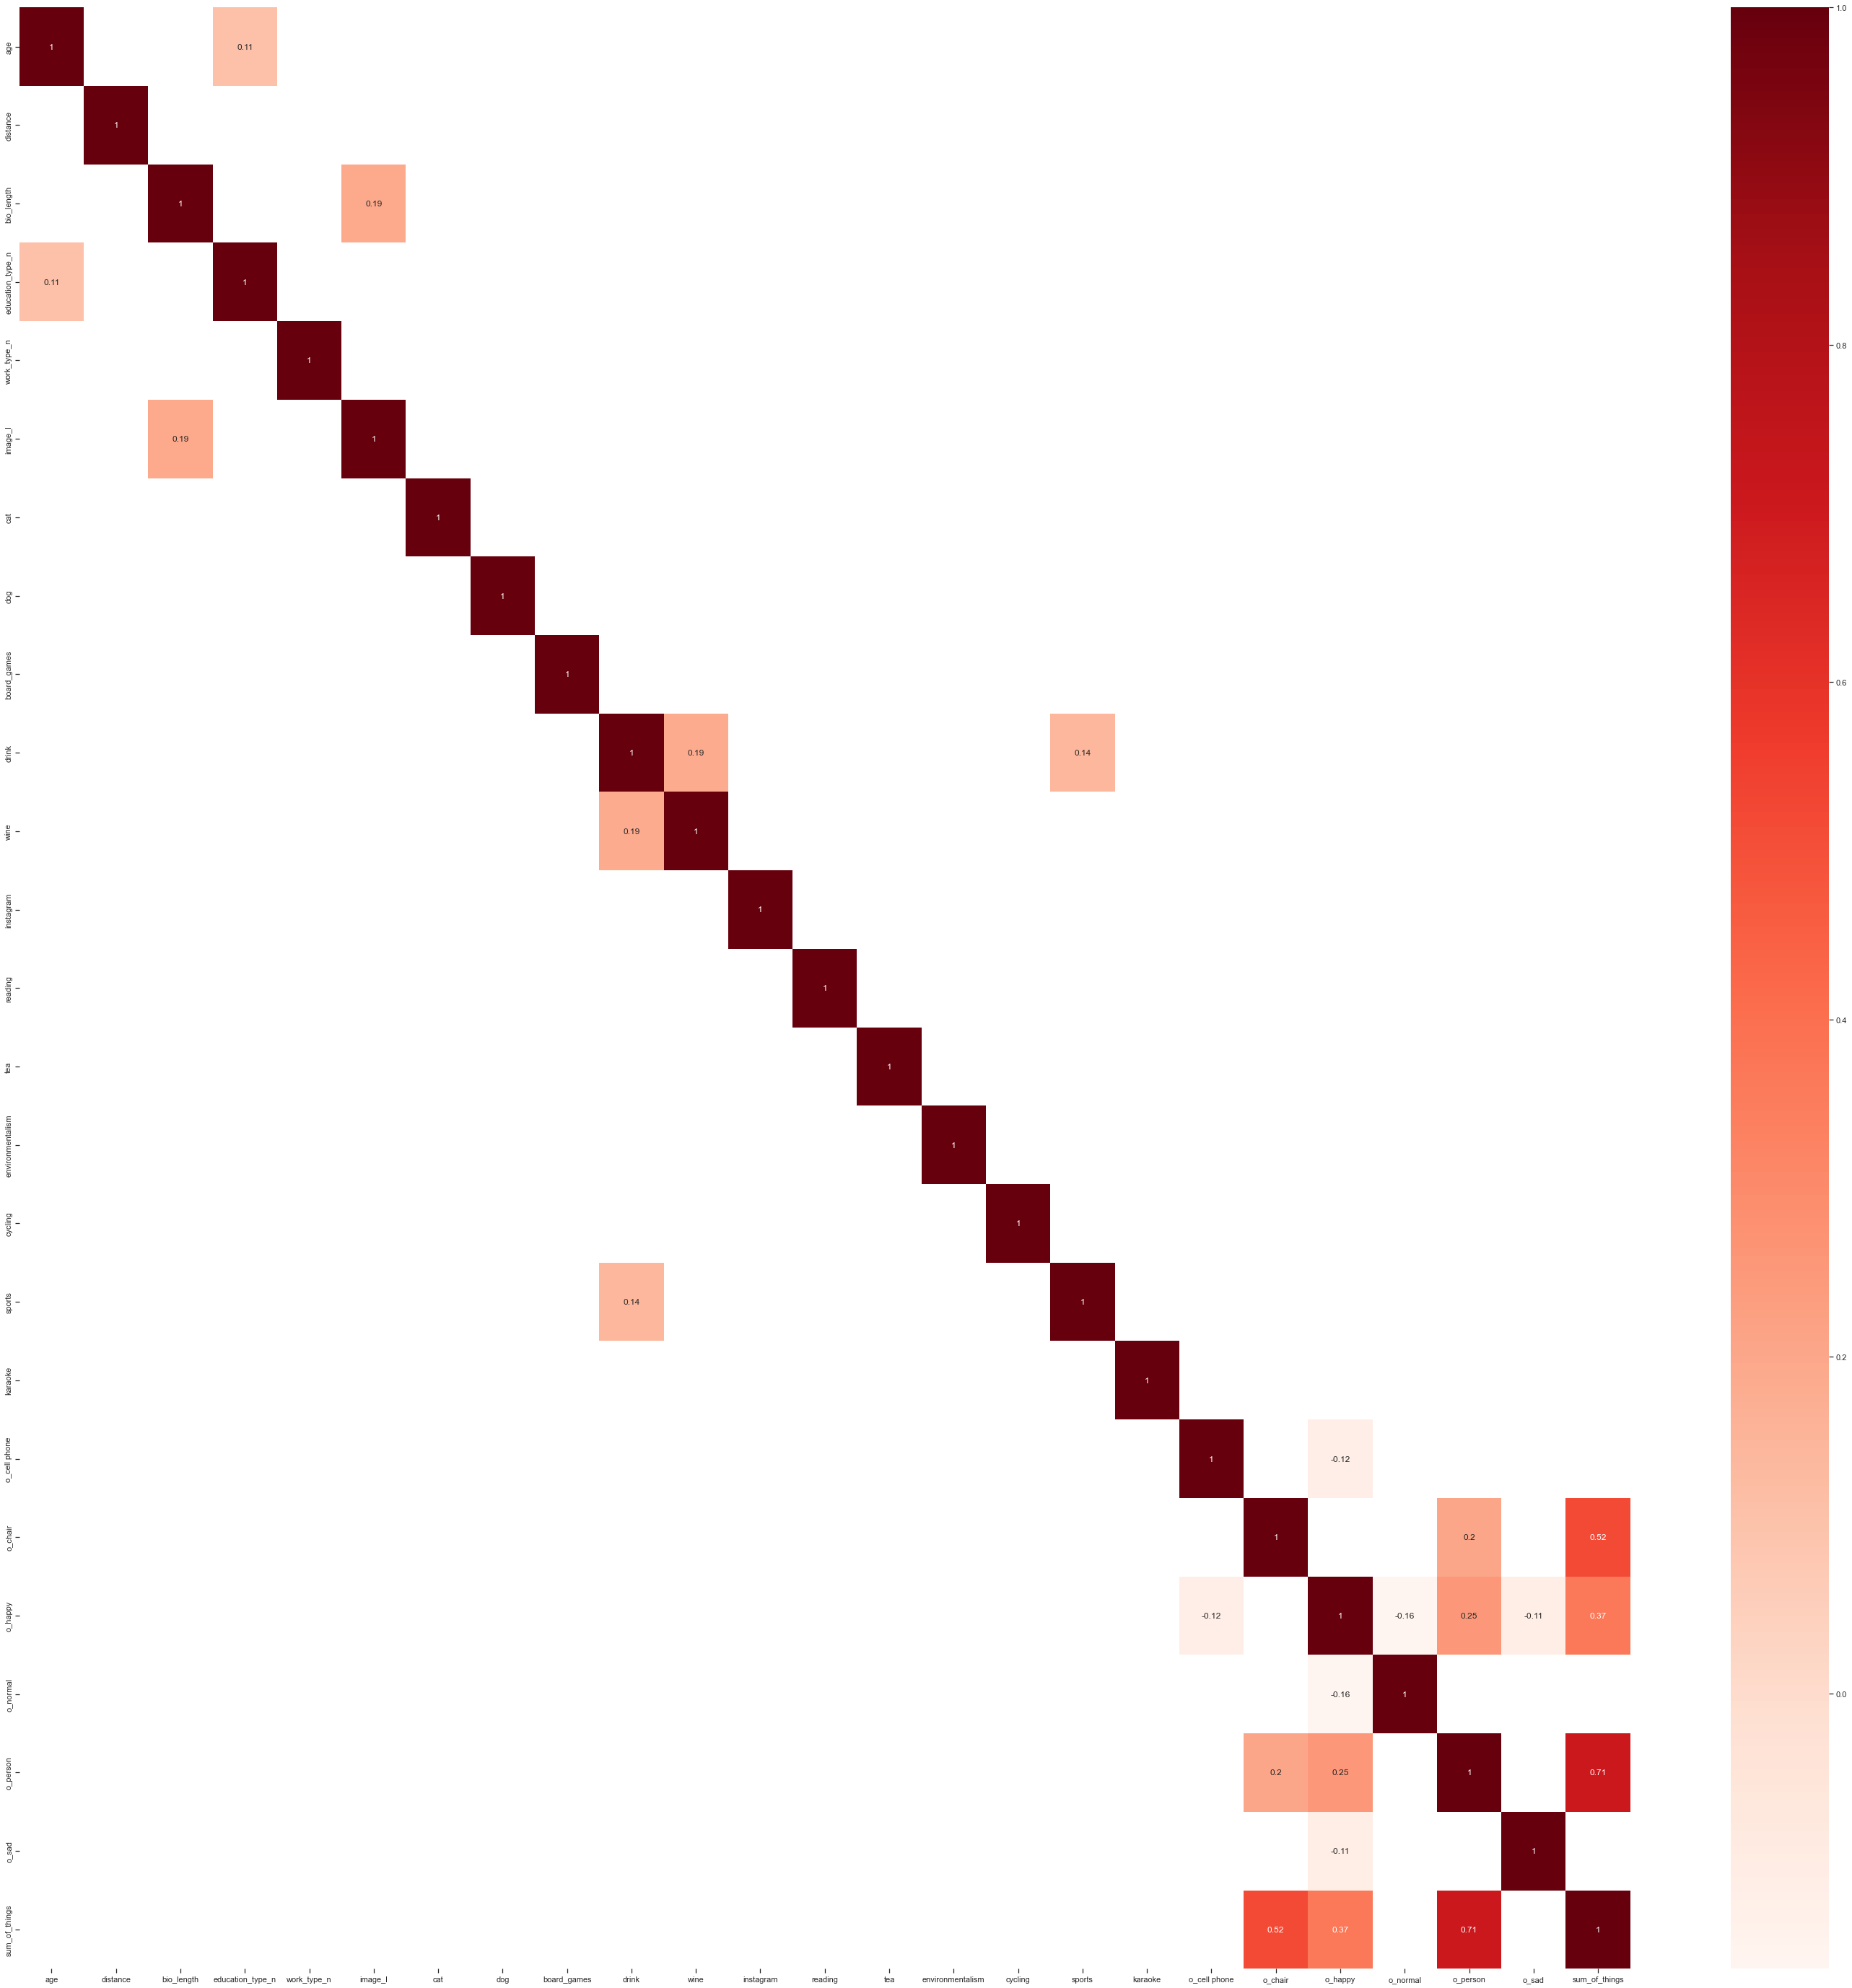

None

sum_of_things     o_person            0.709515
                  o_chair             0.518298
                  o_happy             0.367830
o_person          o_happy             0.250615
                  o_chair             0.201007
bio_length        image_l             0.191515
drink             wine                0.185149
sports            drink               0.143807
education_type_n  age                 0.109112
                  distance            0.093025
bio_length        reading             0.088280
                  cat                 0.079817
age               bio_length          0.073691
o_chair           o_happy             0.068340
drink             dog                 0.064308
education_type_n  instagram           0.063363
bio_length        environmentalism    0.061082
dog               bio_length          0.060663
tea               bio_length          0.059696
                  cat                 0.057676
karaoke           board_games         0.056733
sports       

In [487]:
from IPython.display import display, HTML

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

corr = df.corr()
filtered_corr = corr[(corr >= .1) | (corr <= -.1) & (corr != 1.00 )]
plt.figure(figsize=(50,50))
sns.heatmap(filtered_corr, cmap="Reds",annot=True)
display(corr)
display(plt.show())
display(corrFilter(df, .05))


Karl Pearson will probably turn in his grave over the conclusions I would draw from correlations that are not at all significantly correlated by his definition.


- Fascinating: Tea and reading seem to lead to longer profile biographies.
- Instagram and drinking, on the other hand, do not seem to be conducive in this sense. 
- The situation is similar for dog and cat owners: While both tend to have longer descriptions, cat owners are a bit further ahead. To what extent this is due to the everyday language use of dog owners, which is possibly colored by the increased use of simple voice commands, can only be assumed.
- The amount of images increases with the age and biography length. Do we need to sell us better with increasing age or do we simply have more to show off?
- Instagram as a passion suggests a tendency toward lower educational background, while " reading" indicates higher educational level
- Photos with visible phone (mirror selfies) lead to less happiness in the person


Overall it can already be said that there are no high correlations but also there are so many variables

## Scatterplots


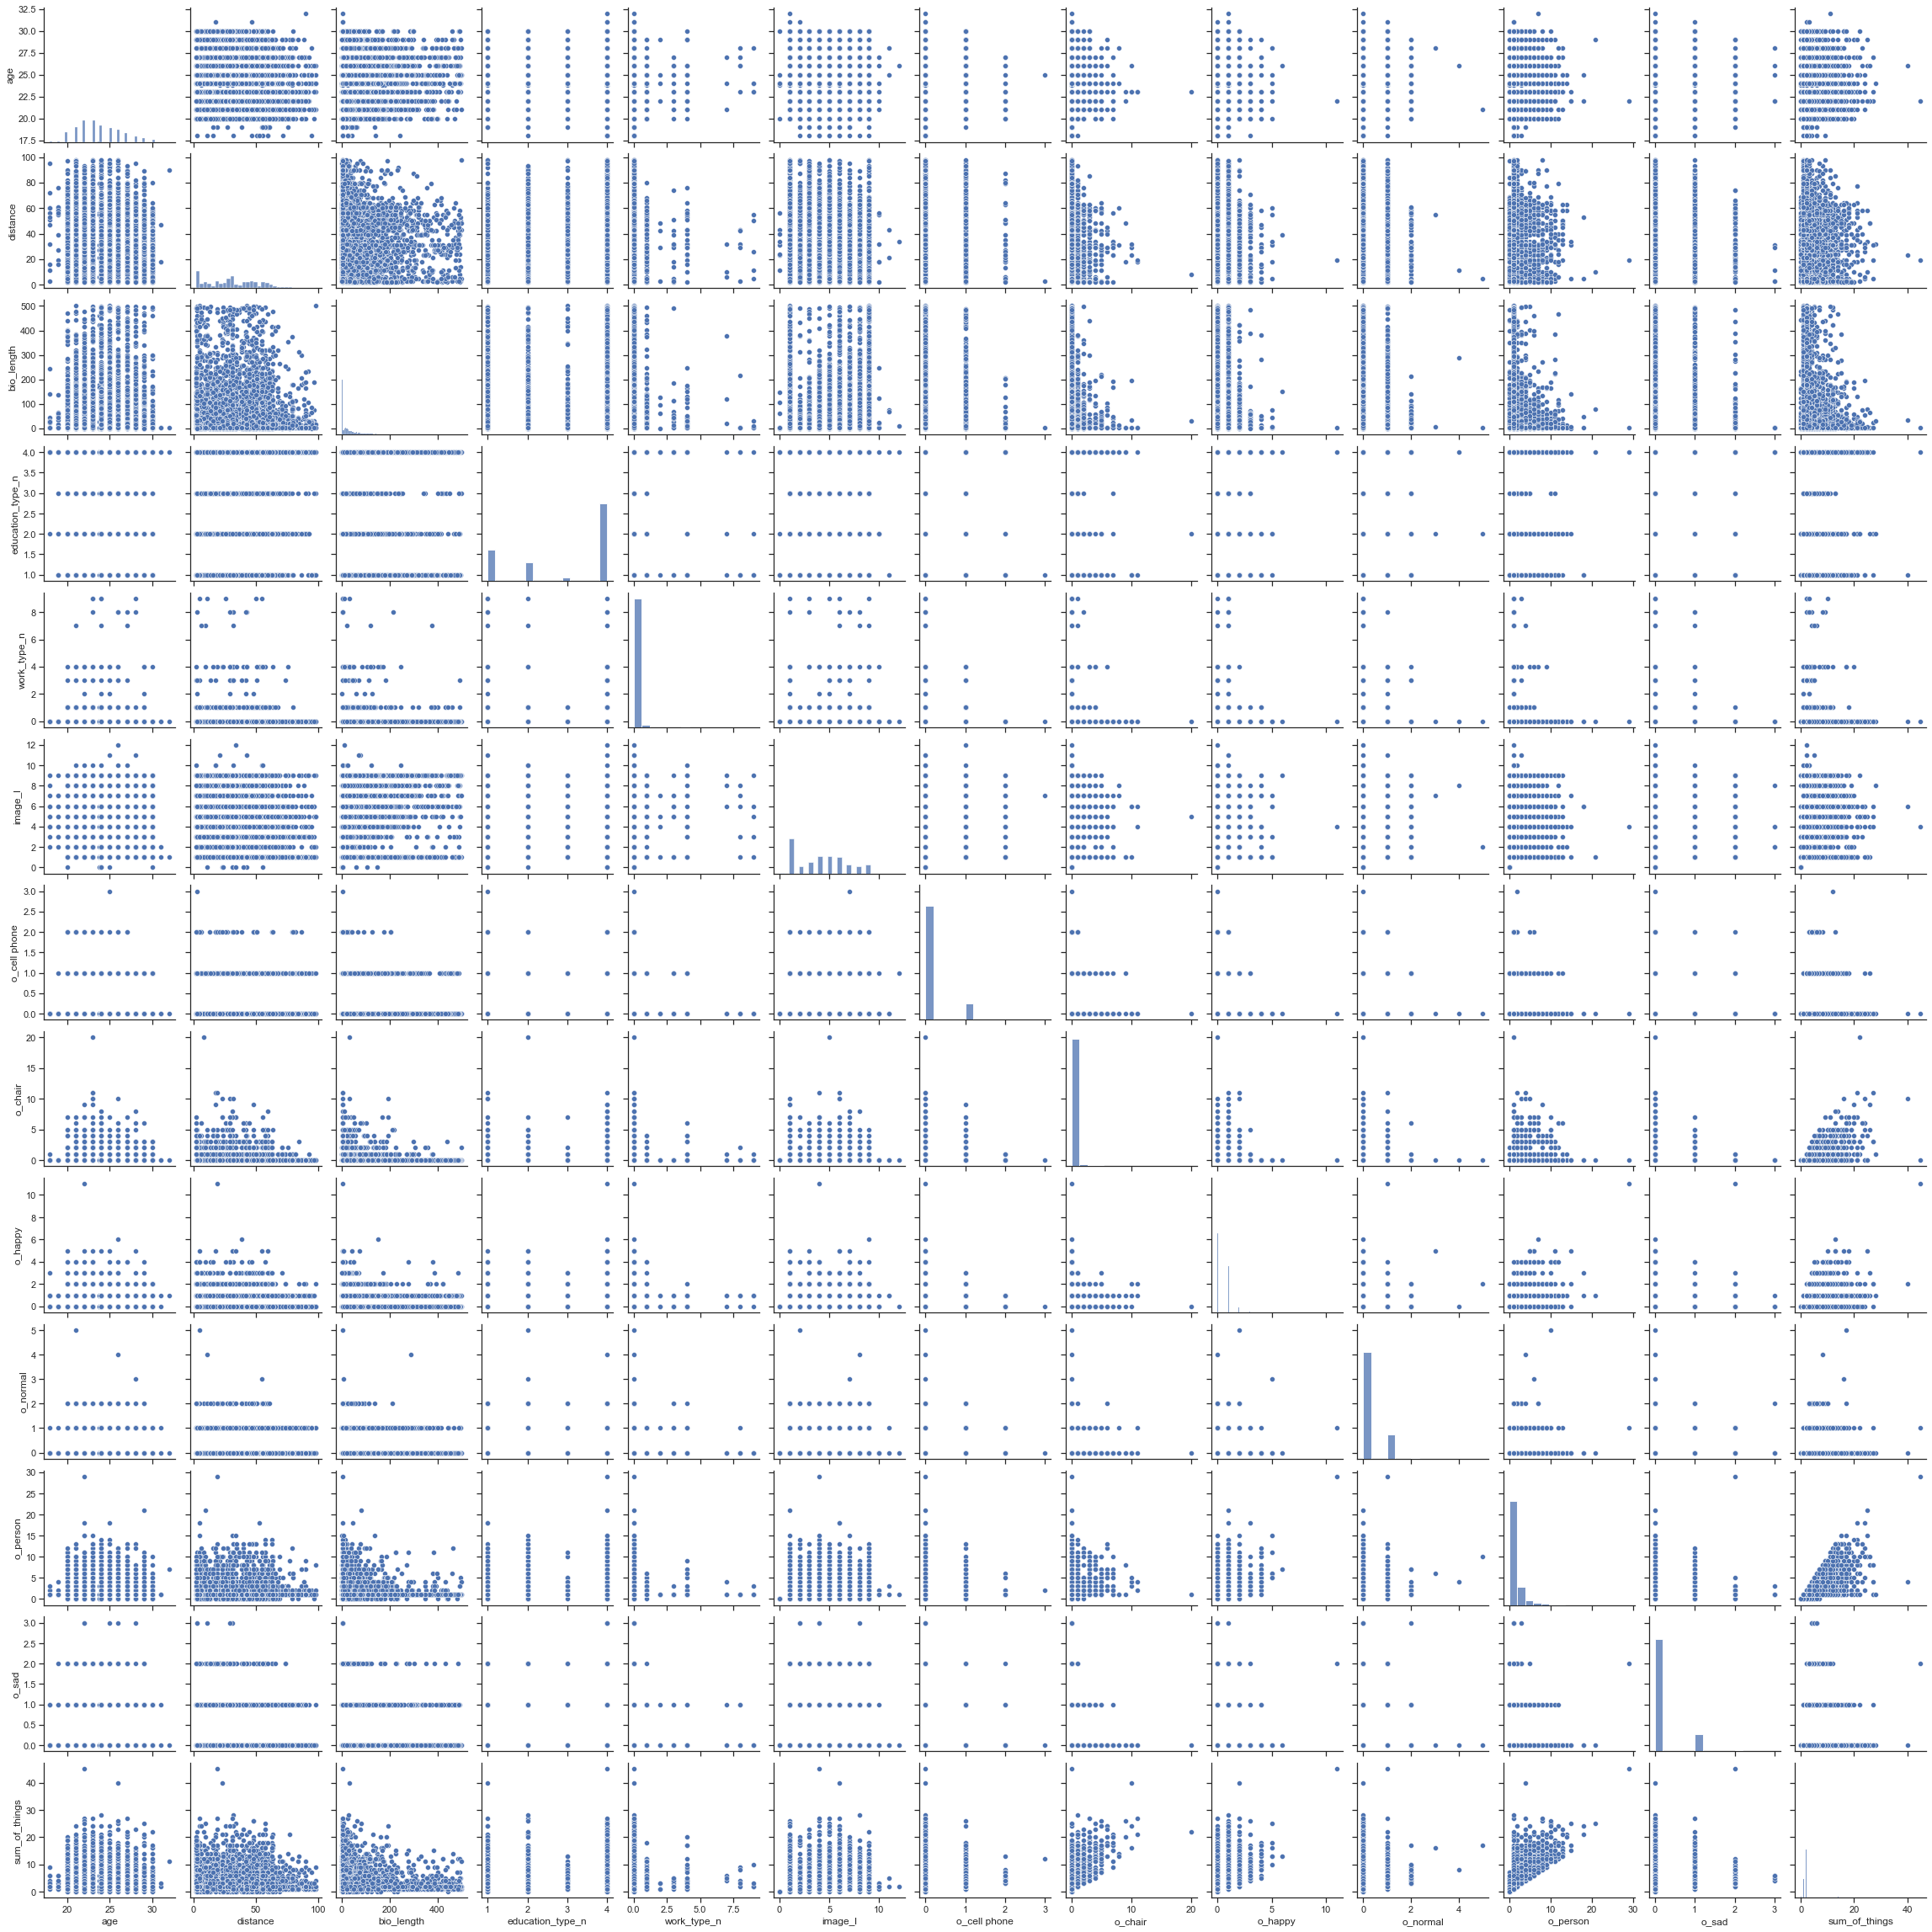

In [488]:
df_num = df.select_dtypes(exclude = ['object', 'bool'])
sns.pairplot(df_num)
plt.show() #using Matplotlib to show the plot


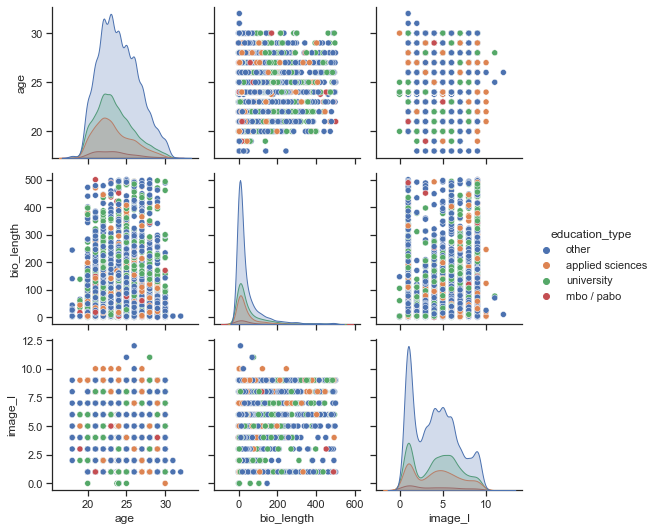

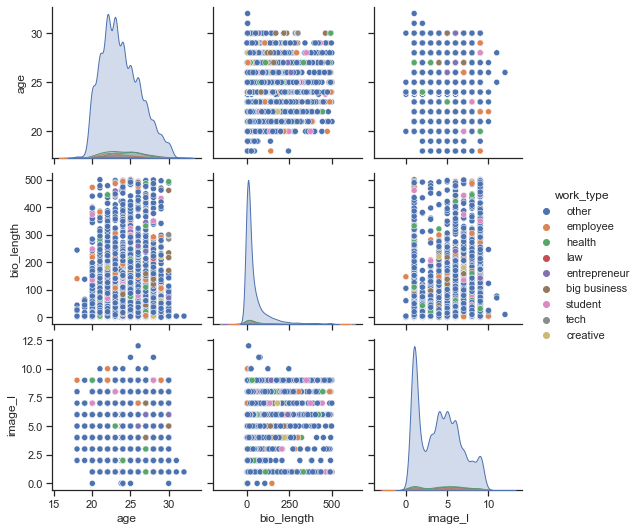

In [489]:
# df_num = df.select_dtypes(exclude = ['object'])
df_num = df.select_dtypes(exclude = ['object', 'bool'])
from IPython.display import display, HTML

sns.set(style="ticks", color_codes=True)
display(sns.pairplot(df, hue='education_type', vars= ['age', 'bio_length', 'image_l'] ))
display(sns.pairplot(df, hue='work_type', vars= ['age', 'bio_length', 'image_l'] ))
# sns.pairplot(df )
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/TinderBotz/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/opt/homebrew/Caskroom/miniforge/base/envs/TinderBotz/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


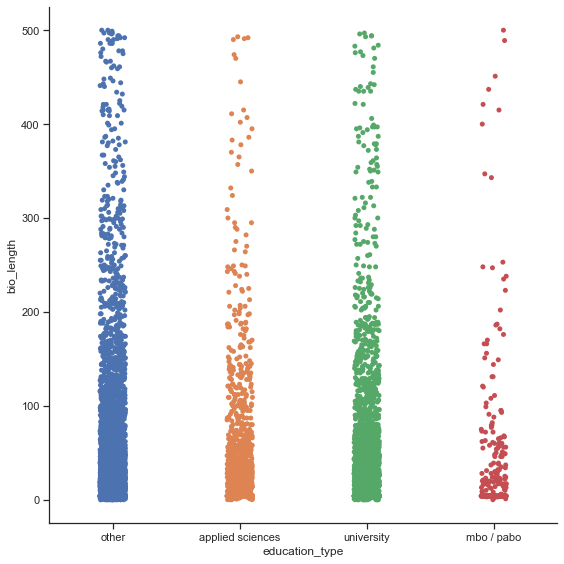

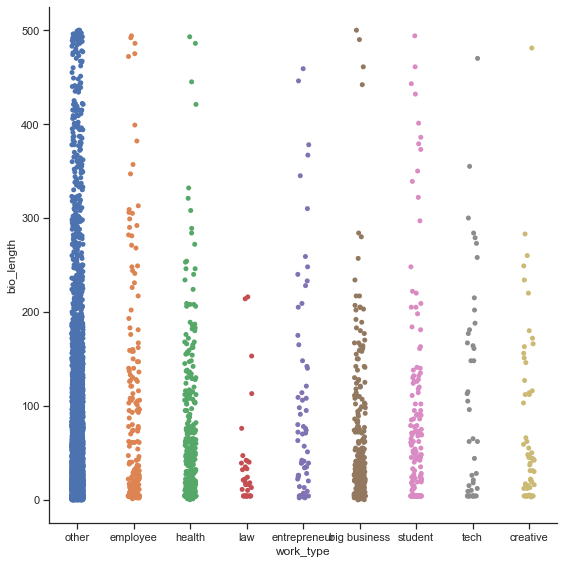

In [490]:
from IPython.display import display, HTML

display(sns.catplot(size=8, x="education_type", y="bio_length", kind="strip", data=df))
display(sns.catplot(size=8, x="work_type", y="bio_length", kind="strip", data=df))



## Age distribution

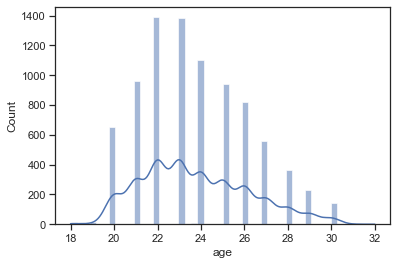

In [491]:
sns.histplot(df.age, kde=True)
plt.show()


## Bio length

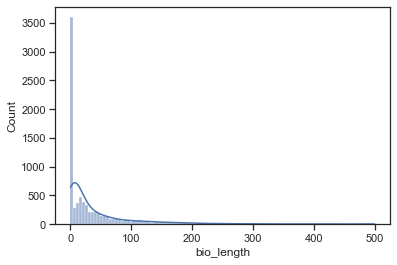

In [492]:
sns.histplot(df.bio_length, kde=True)
plt.show()


The strong focus on bios under 100 characters (max 500 characters) immediately raise the question whether I can make accurate predictions with this. I think I will collect a few more profiles to have more significant data.  

# Prediction 🪄

## Classification with _k_-nearest neigbor 
In this example, we are trying to predict the education level based on different factors we learned about in the 

In [493]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

## Bio length / Reading

In [494]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
from sklearn.model_selection import train_test_split #We need this to split the data
df_edu = df

X = df[['bio_length', 'reading']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['education_type'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [495]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.582622187742436

## Bio length / Age

In [496]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
from sklearn.model_selection import train_test_split #We need this to split the data
df_edu = df

X = df[['bio_length', 'age']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['education_type'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [497]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.5418929402637703

## Age

In [498]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
from sklearn.model_selection import train_test_split #We need this to split the data
df_edu = df

X = df[[ 'age']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['education_type'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [499]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.5865011636927852

# Evaluation: Applying for another iteration #Resit

- Yikes! 3 deadlines on the 28th of January 🏴‍☠️
- I was glad that I priosed down FML at the beginning of the week so as not to get too lost in it, while successfully submitting the other projects that are all about writing (less unexptected things or frustrated moments e.g. with regular expressions that however always get resolved while bringing a good learning curve). 
- Here, however, I have to miss out. Probably would have taken me a few more hours to meet at least the assessment criteria 
- It's been such a long time to get it all running + manage to set up a VS code running with Jupyter Notebook environment for once, which now is really working well and allows for a good  workflow in the future. 
- So: Learning curve great, will use the next days to finish up but with all the other deadlines around it was hard to dive deeper in the topic and use more of those statistical terms I'd want to use (no statistics background here)